# Python Review Q&A

## Links

Some links for additional practice (general programming practice rather than pandas/data analysis):

* https://www.codewars.com/collections/basic-python
* https://www.practicepython.org/
* https://www.hackerrank.com/domains/python
* https://codingbat.com/python


Additional links:
* https://realpython.com/python-beginner-tips/ (tips for getting better at Python)
* https://automatetheboringstuff.com (full book going over tasks Python can accomplish; does have questions at the end of each chapter with answers in back of book)

### Dictionary sum

Write a function that accepts a dictionary and threshold value.  The function should sum all of the dictionary values who's keys are greater than or equal to the threshold.  The dictionary will have both numeric keys and values (ie `{1: 2, 3: 4, 5: 6}`).

Example

```python
d = {1: 2, 3: 4, 5: 6}

your_function(d, 3)
# Expected output is 10.
# The keys 3 & 5 are greater than or equal to the threshold of 3.
# The values corresponding to the keys 3 & 5 are 4 & 6, and 4 + 6 = 10.
```

In [32]:
def dic_sum_threshold(my_dict, threshold):
    total = 0
    for key in my_dict:
        if key >= threshold:
            total += my_dict[key]
    return total

dic_sum_threshold({1: 2, 3: 4, 5: 6}, 3)

10

### Pandas practice

> ##### Description
> The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).
>
> ##### Columns
A data frame with 32 observations on 11 (numeric) variables.
>
> ```
>  1. mpg    Miles/(US) gallon
>  2. cyl    Number of cylinders
>  3. disp   Displacement (cu.in.)
>  4. hp     Gross horsepower
>  5. drat   Rear axle ratio
>  6. wt     Weight (1000 lbs)
>  7. qsec   1/4 mile time
>  8. vs     Engine (0 = V-shaped, 1 = straight)
>  9. am     Transmission (0 = automatic, 1 = manual)
> 10. gear   Number of forward gears
> 11. carb   Number of carburetors
> ```

In [35]:
!pip install nb_black

#load_ext nb_black

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

mtcars_url = 'https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv'

Read the data frame using `mtcars_url`

In [9]:
mtcars_df = pd.read_csv(mtcars_url)

Print the first 8 rows of the dataframe.

In [40]:
mtcars_df.head(8)
mtcars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Car Model  32 non-null     object 
 1   mpg        32 non-null     float64
 2   cyl        32 non-null     int64  
 3   disp       32 non-null     float64
 4   hp         32 non-null     int64  
 5   drat       32 non-null     float64
 6   wt         32 non-null     float64
 7   qsec       32 non-null     float64
 8   vs         32 non-null     int64  
 9   am         32 non-null     int64  
 10  gear       32 non-null     int64  
 11  carb       32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


Rename the first column to something more meaningful.

In [18]:
mtcars_df.rename(columns={'Unnamed: 0': 'Car Model'}, inplace=True)
mtcars_df.head()

,Car Model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Plot the distribution of the `cyl` column.  Is this a continuous or discrete variable?

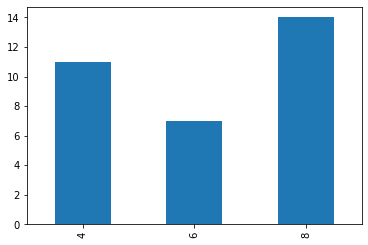

In [30]:
mtcars_df['cyl'].value_counts().sort_index().plot.bar()
# This a continuous variab

What is the minimum value in the `mpg` column?

In [39]:
print('The minimum value of column \'{}\' is {}'.format('mpg', mtcars_df['mpg'].min()))

The minimum value of column 'mpg' is 10.4


What is the name of the car with `mpg` equal to `15.0`?

In [57]:
print(mtcars_df.loc[mtcars_df['mpg']==15.0, 'Car Model'].iloc[0])
#mtcars_df.loc[30]

Maserati Bora


What is the name of the car that has the best gas mileage?

In [88]:
best_mpg_car = mtcars_df.sort_values(by='mpg',ascending=False).head(1)['Car Model'].iloc[0]
#print(best_mpg_car)
print('The car with the best gas milage is the {} at {} mpg'.format(best_mpg_car, mtcars_df.loc[mtcars_df['Car Model']==best_mpg_car, 'mpg'].iloc[0]))
#print(mtcars_df.sort_values(by='mpg',ascending=False).head(1))

The car with the best gas milage is the Toyota Corolla at 33.9 mpg


Use (1) your intuition from the variable descriptions and (2) visulaizations to find 2 variables that appear to be *positively* correlated.

The corrleation of cylinders and displacement is 0.902032872146999


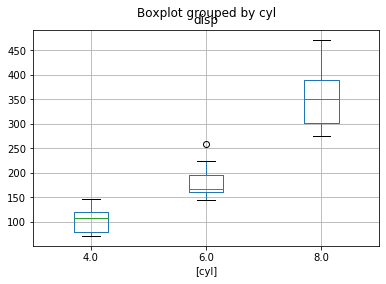

In [108]:
# Displacement is the volume of air moved by the cylinders. It reasons that more cylinders would push more air
cyl_disp_corr = mtcars_df['cyl'].corr(mtcars_df['disp'])
print('The corrleation of cylinders and displacement is {}'.format(cyl_disp_corr))
mtcars_by_cyl_df = pd.DataFrame([mtcars_df['cyl'], mtcars_df['disp']]).transpose()
#mtcars_by_cyl_df.head()
boxplot = mtcars_by_cyl_df.boxplot(by='cyl')

Use (1) your intuition from the variable descriptions and (2) visulaizations to find 2 variables that appear to be *negatively* correlated.

The corrleation of horsepower and 1/4 mile time is -0.7082233888619532


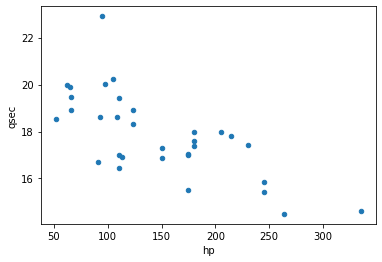

In [112]:
hp_qsec_corr = mtcars_df['hp'].corr(mtcars_df['qsec'])
print('The corrleation of horsepower and 1/4 mile time is {}'.format(hp_qsec_corr))
mtcars_by_hp_df = pd.DataFrame([mtcars_df['hp'], mtcars_df['qsec']]).transpose()
#mtcars_by_cyl_df.head()
scatter = mtcars_by_hp_df.plot.scatter(x='hp',y='qsec')